In [1]:
import pandas as pd
import numpy as np


In [2]:
# File paths
input_file = r"updated_wells_data.xlsx"
output_file = r"cleaned_wells.xlsx"

In [3]:
excel = pd.ExcelFile(input_file, engine='openpyxl')

In [4]:
def clean_sheet(df):
    # 1. Remove negative values
    df[df < 0] = np.nan

    # 2. Fill missing values using rolling window (5 above + 5 below)
    df_filled = df.copy()
    for col in df.columns:
        df_filled[col] = df[col].combine_first(
            df[col].rolling(window=11, min_periods=1, center=True).mean()
        )

    # 3. Remove rows where any value <= 0 or still NaN
    df_cleaned = df_filled.dropna()
    df_cleaned = df_cleaned[(df_cleaned > 0).all(axis=1)]
    
    return df_cleaned

In [5]:
# Write cleaned sheets to a new Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name in excel.sheet_names:
        df = pd.read_excel(input_file, sheet_name=sheet_name)
        df_cleaned = clean_sheet(df)
        df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaning done! File saved at:", output_file)

C:\Users\vm822\AppData\Local\Temp\ipykernel_18452\3638533319.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_filled[col] = df[col].combine_first(
C:\Users\vm822\AppData\Local\Temp\ipykernel_18452\3638533319.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_filled[col] = df[col].combine_first(
C:\Users\vm822\AppData\Local\Temp\ipykernel_18452\3638533319.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To ret

Cleaning done! File saved at: cleaned_wells.xlsx


for sheet 2 separately

In [ ]:
import pandas as pd
import numpy as np

# File paths
input_file = r"test.xlsx"   # <- replace with your new file path
output_file = r"Cleaned_New_Well_sheet2.xlsx"

# Load Excel file
excel = pd.ExcelFile(input_file, engine='openpyxl')

# Columns you want to clean
columns_to_clean = [
    "Depth",
    "Hook Load(klb)",
    "Bit Weight(klb)",
    "Rotary RPM(RPM)",
    "Flow In Rate(galUS/min)",
    "ROP - Average(m/hr)"
]

def clean_sheet(df):
    # Keep only the columns we care about
    df = df[columns_to_clean]

    # 1. Remove negative values
    df[df < 0] = np.nan

    # 2. Fill missing values using rolling window (5 above + 5 below)
    df_filled = df.copy()
    for col in df.columns:
        df_filled[col] = df[col].combine_first(
            df[col].rolling(window=11, min_periods=1, center=True).mean()
        )

    # 3. Remove rows where any value <= 0 or still NaN
    df_cleaned = df_filled.dropna()
    df_cleaned = df_cleaned[(df_cleaned > 0).all(axis=1)]
    
    return df_cleaned

# Write cleaned sheets to a new Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name in excel.sheet_names:
        df = pd.read_excel(input_file, sheet_name=sheet_name)
        df_cleaned = clean_sheet(df)
        df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaning done! File saved at:", output_file)








Cleaning done! File saved at: Cleaned_New_Well_sheet2.xlsx


C:\Users\vm822\AppData\Local\Temp\ipykernel_23028\3691456074.py:31: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_filled[col] = df[col].combine_first(


In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
file_path = r"cleaned_wells_final.xlsx"

In [4]:
excel = pd.ExcelFile(file_path, engine="openpyxl")

In [5]:
all_wells = []

In [6]:
for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()   # remove hidden spaces


In [7]:
df = df[
    [
        "Bit Weight(klb)",
        "RPM(RPM)",
        "Flow In Rate(galUS/min)",
        "ROP - Average(m/hr)"
    ]
]


In [8]:
df = df.dropna()
df = df[(df > 0).all(axis=1)]

In [9]:
all_wells.append(df)

In [10]:
final_df = pd.concat(all_wells, ignore_index=True)

In [11]:
X = final_df[
    [
        "Bit Weight(klb)",
        "RPM(RPM)",
        "Flow In Rate(galUS/min)"
    ]
]



In [12]:
y = final_df["ROP - Average(m/hr)"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

In [15]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print("R²   :", r2_score(y_test, y_pred))
print("MAE  :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

R²   : 0.8304263937223768
MAE  : 1.008938748055592
RMSE : 1.5619129186195286


In [18]:
import pandas as pd
import numpy as np

# Create random test inputs
test_data = pd.DataFrame({
    "Bit Weight(klb)": np.random.uniform(20, 45, 5),
    "RPM(RPM)": np.random.uniform(60, 180, 5),
    "Flow In Rate(galUS/min)": np.random.uniform(400, 900, 5)
})

print("Random Test Parameters:")
print(test_data)


Random Test Parameters:
   Bit Weight(klb)    RPM(RPM)  Flow In Rate(galUS/min)
0        35.777566   70.325020               834.041342
1        37.799128   77.144522               516.519025
2        44.970845  178.887245               425.376278
3        41.645815  114.370247               748.437834
4        20.731504   67.193353               445.310337


In [19]:
# Predict ROP
test_data["Predicted ROP (m/hr)"] = model.predict(test_data)

print("\nPredicted ROP Results:")
print(test_data)



Predicted ROP Results:
   Bit Weight(klb)    RPM(RPM)  Flow In Rate(galUS/min)  Predicted ROP (m/hr)
0        35.777566   70.325020               834.041342             12.027712
1        37.799128   77.144522               516.519025              3.623852
2        44.970845  178.887245               425.376278              2.145091
3        41.645815  114.370247               748.437834             12.198431
4        20.731504   67.193353               445.310337             10.009415


In [ ]:
single_test = pd.DataFrame({
    "Bit Weight(klb)": [4.906291962],
    "RPM(RPM)": [74.62577057],
    "Flow In Rate(galUS/min)": [597.6404419]
})

rop_prediction = model.predict(single_test)
print("Predicted ROP:", rop_prediction[0])





Predicted ROP: 6.120832382837931


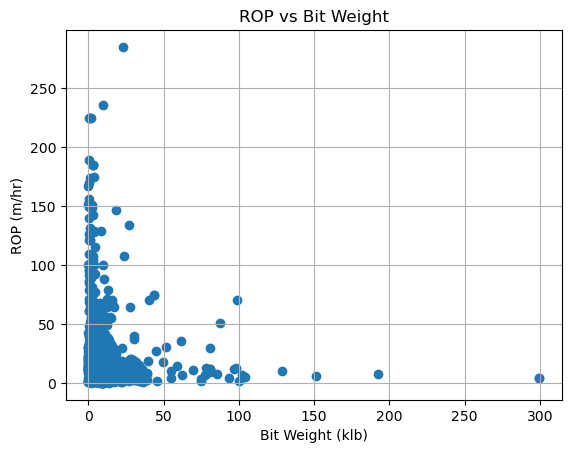

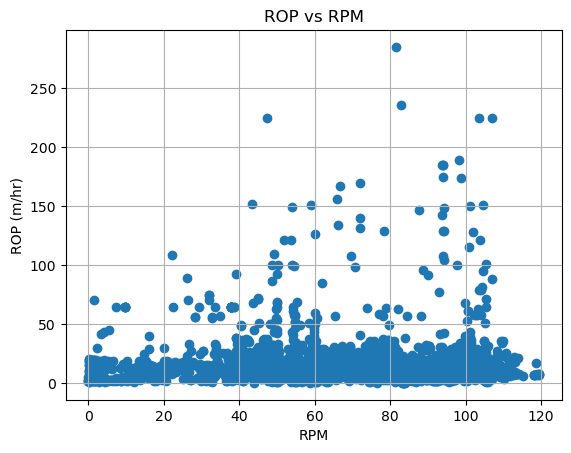

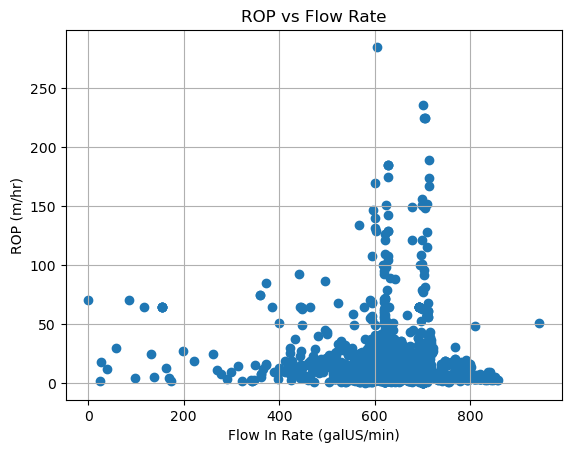

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"cleaned_wells_final.xlsx"

excel = pd.ExcelFile(file_path, engine="openpyxl")
all_wells = []

column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",
    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",
    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",
    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    # Rename columns safely
    df = df.rename(columns=lambda x: column_map.get(x, x))

    # Check required columns exist
    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        print(f"Skipping sheet '{sheet}' (missing columns)")
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]
    all_wells.append(df)

# Combine all wells
data = pd.concat(all_wells, ignore_index=True)

# -----------------------------
# PLOTS
# -----------------------------

plt.figure()
plt.scatter(data["WOB"], data["ROP"])
plt.xlabel("Bit Weight (klb)")
plt.ylabel("ROP (m/hr)")
plt.title("ROP vs Bit Weight")
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(data["RPM"], data["ROP"])
plt.xlabel("RPM")
plt.ylabel("ROP (m/hr)")
plt.title("ROP vs RPM")
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(data["Flow"], data["ROP"])
plt.xlabel("Flow In Rate (galUS/min)")
plt.ylabel("ROP (m/hr)")
plt.title("ROP vs Flow Rate")
plt.grid(True)
plt.show()


In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Polynomial Regression Model
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])


In [26]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [27]:
# Evaluation
print("Polynomial Regression (ALL WELLS)")
print("--------------------------------")
print("R²   :", r2_score(y_test, y_pred))
print("MAE  :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

Polynomial Regression (ALL WELLS)
--------------------------------
R²   : 0.8304263937223768
MAE  : 1.008938748055592
RMSE : 1.5619129186195286


In [29]:
single_test = pd.DataFrame({
    "Bit Weight(klb)": [4.906291962],
    "RPM(RPM)": [74.62577057],
    "Flow In Rate(galUS/min)": [597.6404419]
})


In [30]:
single_test = single_test.rename(
    columns={c: column_map[c] for c in single_test.columns if c in column_map}
)


In [31]:
rop_prediction = poly_model.predict(single_test)
print("Predicted ROP (m/hr):", rop_prediction[0])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Flow
- RPM
- WOB
Feature names seen at fit time, yet now missing:
- Bit Weight(klb)
- Flow In Rate(galUS/min)
- RPM(RPM)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error


In [33]:
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}


In [34]:
file_path = "cleaned_wells_final.xlsx"   # change if needed
excel = pd.ExcelFile(file_path)

all_wells = []

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Rename columns using map
    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required_cols = ["WOB", "RPM", "Flow", "ROP"]

    # Skip sheet if required columns not present
    if not all(col in df.columns for col in required_cols):
        continue

    df = df[required_cols]

    # Drop NaN
    df = df.dropna()

    # Remove non-positive values
    df = df[(df > 0).all(axis=1)]

    all_wells.append(df)

# Combine all wells into one dataset
data = pd.concat(all_wells, ignore_index=True)

print("Total samples from all wells:", data.shape[0])


Total samples from all wells: 7292


In [35]:
X = data[["WOB", "RPM", "Flow"]]
y = data["ROP"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly_model.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [37]:
y_pred = poly_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.05525739799276086
MAE: 5.445379543733525


In [39]:
single_test = pd.DataFrame({
    "Bit Weight(klb)": [5.250195026],
    "RPM(RPM)": [75.56718445],
    "Flow In Rate(galUS/min)": [597.1154785]
})

# Rename using same map
single_test = single_test.rename(
    columns={c: column_map[c] for c in single_test.columns if c in column_map}
)

rop_prediction = poly_model.predict(single_test)

print("Predicted ROP (m/hr):", rop_prediction[0])


Predicted ROP (m/hr): 12.679932430189012


In [40]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE (m/hr):", mae)


MAE (m/hr): 5.445379543733525


In [41]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

d:\folder\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [42]:
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}


In [43]:
file_path = "cleaned_wells_final.xlsx"
excel = pd.ExcelFile(file_path)

all_wells = []

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]

    all_wells.append(df)

data = pd.concat(all_wells, ignore_index=True)

print("Total samples:", data.shape[0])


Total samples: 7292


In [44]:
X = data[["WOB", "RPM", "Flow"]]
y = data["ROP"]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
ann_model = Sequential([
    Dense(64, activation="relu", input_shape=(3,)),
    Dense(32, activation="relu"),
    Dense(1)   # ROP output
])

ann_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)



d:\folder\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 280.4076 - mae: 9.7248 - val_loss: 307.1645 - val_mae: 6.8760
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185.3598 - mae: 6.1506 - val_loss: 290.2078 - val_mae: 7.0127
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182.1997 - mae: 6.1282 - val_loss: 288.3605 - val_mae: 6.9408
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.5250 - mae: 6.1122 - val_loss: 287.2517 - val_mae: 6.8188
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.5360 - mae: 6.0378 - val_loss: 285.4906 - val_mae: 6.9164
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178.5003 - mae: 5.9674 - val_loss: 284.4845 - val_mae: 6.9928
Epoch 7/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177.7820 - mae: 5.9908 - val_loss: 284.7216 - val_mae: 6.7285
Epoch 8/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.7731 - mae: 5.9451 - val_loss: 283.8320 - val_mae: 6.7637
Epoch 9/200
146/

In [50]:
y_pred = ann_model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("ANN MAE (m/hr):", mae)
print("ANN RMSE (m/hr):", rmse)
print("ANN R²:", r2)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN MAE (m/hr): 5.339120177527367
ANN RMSE (m/hr): 11.165643415111045
ANN R²: 0.12783578305117393


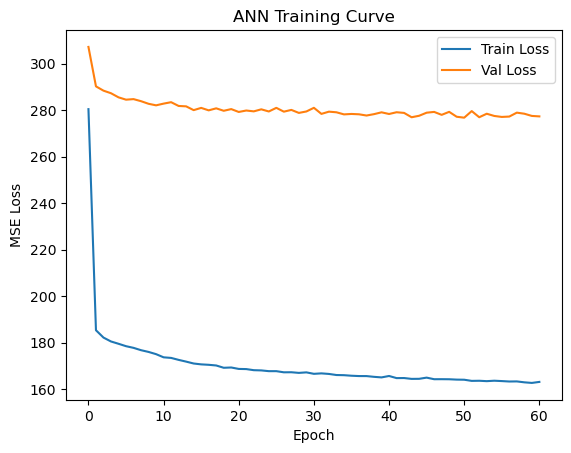

In [51]:
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("ANN Training Curve")
plt.show()


In [ ]:
single_test = pd.DataFrame({
    "Bit Weight(klb)": [7.573462963],
    "RPM(RPM)": [72.10891724],
    "Flow In Rate(galUS/min)": [00.4078979]
})

single_test = single_test.rename(
    columns={c: column_map[c] for c in single_test.columns if c in column_map}
)

single_test_scaled = scaler.transform(single_test)

rop_pred = ann_model.predict(single_test_scaled)

print("Predicted ROP (m/hr):", rop_pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted ROP (m/hr): 42.191593


7.573462963	72.10891724	600.4078979


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [2]:
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}


In [3]:
file_path = "cleaned_wells_final.xlsx"
excel = pd.ExcelFile(file_path)


In [4]:
well_models = {}      # store model per well
well_data_count = {} # optional: number of samples per well

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]

    if len(df) < 30:   # safety check
        continue

    X = df[["WOB", "RPM", "Flow"]]
    y = df["ROP"]

    model = Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("lr", LinearRegression())
    ])

    model.fit(X, y)

    well_models[sheet] = model
    well_data_count[sheet] = len(df)

print("Models trained for wells:", list(well_models.keys()))


Models trained for wells: ['WELL#1', 'WELL#2', 'WELL#3', 'WELL#4', 'WELL#5', 'WELL#6', 'WELL#7', 'WELL#8', 'WELL#9', 'WELL#10']


In [7]:
single_test = pd.DataFrame({
    "Bit Weight(klb)": [4.071893692],
    "RPM(RPM)": [61.69708252],
    "Flow In Rate(galUS/min)": [428.9214783]
})

single_test = single_test.rename(
    columns={c: column_map[c] for c in single_test.columns if c in column_map}
)


In [8]:
results = []

for well, model in well_models.items():
    rop_pred = model.predict(single_test)[0]
    results.append({
        "Well": well,
        "Predicted ROP (m/hr)": rop_pred
    })

results_df = pd.DataFrame(results)
print(results_df)


      Well  Predicted ROP (m/hr)
0   WELL#1             12.870152
1   WELL#2             19.930709
2   WELL#3             82.252203
3   WELL#4             23.160075
4   WELL#5             31.036822
5   WELL#6             29.433315
6   WELL#7            117.454191
7   WELL#8              9.001945
8   WELL#9              1.882176
9  WELL#10             -6.096592


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

well_models = {}
well_data_count = {}
well_metrics = []   # <-- store R2 & MSE here

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]

    if len(df) < 30:
        continue

    X = df[["WOB", "RPM", "Flow"]]
    y = df["ROP"]

    # 🔹 Train-test split PER WELL
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("lr", LinearRegression())
    ])

    model.fit(X_train, y_train)

    # 🔹 Predictions
    y_pred = model.predict(X_test)

    # 🔹 Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    well_models[sheet] = model
    well_data_count[sheet] = len(df)

    well_metrics.append({
        "Well": sheet,
        "Samples": len(df),
        "R2": r2,
        "MSE": mse
    })

# 🔹 Final metrics table
metrics_df = pd.DataFrame(well_metrics)
print(metrics_df)


      Well  Samples        R2          MSE
0   WELL#1      360  0.722368     9.474053
1   WELL#2     1262  0.095798    51.712956
2   WELL#3     1221  0.101656   211.524050
3   WELL#4      337  0.108779  1874.874954
4   WELL#5      625  0.000865    57.625981
5   WELL#6     1135  0.045453   233.844106
6   WELL#7      308  0.495324    15.599005
7   WELL#8      137 -0.336147    11.133798
8   WELL#9     1002  0.014900    12.156075
9  WELL#10      905  0.682747     4.564165


In [11]:
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}


In [12]:
file_path = "cleaned_wells_final.xlsx"
excel = pd.ExcelFile(file_path)


In [14]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [15]:
well_models = {}
well_metrics = []

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]

    if len(df) < 30:
        continue

    X = df[["WOB", "RPM", "Flow"]]
    y = df["ROP"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Random Forest Regressor
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    well_models[sheet] = model

    well_metrics.append({
        "Well": sheet,
        "Samples": len(df),
        "R2": r2,
        "MSE": mse,
        "MAE": mae
    })

# Metrics table
metrics_df = pd.DataFrame(well_metrics)
print(metrics_df)


      Well  Samples        R2          MSE        MAE
0   WELL#1      360  0.579588    14.346339   2.273167
1   WELL#2     1262  0.250616    42.858632   3.271520
2   WELL#3     1221  0.927707    17.022111   2.401906
3   WELL#4      337 -0.004585  2113.360789  24.998684
4   WELL#5      625  0.518139    27.791753   3.521421
5   WELL#6     1135 -0.032842   253.024674   7.579283
6   WELL#7      308  0.155293    26.108996   2.893617
7   WELL#8      137  0.173554     6.886579   1.843372
8   WELL#9     1002  0.064456    11.544561   2.442205
9  WELL#10      905  0.827347     2.483870   1.041795


In [16]:
def predict_rop_per_well(wob, rpm, flow, well_models, column_map):
    import pandas as pd

    # Prepare input dataframe
    test_df = pd.DataFrame({
        "Bit Weight(klb)": [wob],
        "RPM(RPM)": [rpm],
        "Flow In Rate(galUS/min)": [flow]
    })

    # Rename columns according to column_map
    test_df = test_df.rename(
        columns={c: column_map[c] for c in test_df.columns if c in column_map}
    )

    results = []
    for well, model in well_models.items():
        rop_pred = model.predict(test_df)[0]
        results.append({
            "Well": well,
            "Predicted ROP (m/hr)": rop_pred
        })

    results_df = pd.DataFrame(results)

    # Find maximum
    best_well = results_df.loc[results_df["Predicted ROP (m/hr)"].idxmax()]

    return results_df, best_well


In [ ]:
# Your trained per-well RF models and column_map
# well_models = {...} 
# column_map = {...}

wob_input = 4.071893692

rpm_input =61.69708252

flow_input = 428.9214783


rop_per_well, max_rop = predict_rop_per_well(
    wob_input, rpm_input, flow_input, well_models, column_map
)

print("Predicted ROP per well:\n", rop_per_well)
print("\nBest well:", max_rop["Well"])
print("Maximum predicted ROP:", max_rop["Predicted ROP (m/hr)"])



Predicted ROP per well:
       Well  Predicted ROP (m/hr)
0   WELL#1             10.858702
1   WELL#2             19.341823
2   WELL#3              8.323077
3   WELL#4             23.653756
4   WELL#5             16.905289
5   WELL#6             31.230806
6   WELL#7             51.958384
7   WELL#8              8.151474
8   WELL#9              8.387360
9  WELL#10              9.880188

Best well: WELL#7
Maximum predicted ROP: 51.95838372998951


In [19]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [20]:
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}


In [21]:
file_path = "cleaned_wells_final.xlsx"
excel = pd.ExcelFile(file_path)

all_data = []

for sheet in excel.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()

    df = df.rename(columns={c: column_map[c] for c in df.columns if c in column_map})

    required = ["WOB", "RPM", "Flow", "ROP"]
    if not all(col in df.columns for col in required):
        continue

    df = df[required].dropna()
    df = df[(df > 0).all(axis=1)]

    all_data.append(df)

# Combine all wells into one dataframe
global_df = pd.concat(all_data, ignore_index=True)
print("Total samples across all wells:", len(global_df))


Total samples across all wells: 7292


In [40]:
X = global_df[["WOB", "RPM", "Flow"]]
y = global_df["ROP"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [41]:
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.4563
MSE: 77.7259
MAE: 3.8927


In [42]:
new_input = pd.DataFrame({
    "Bit Weight(klb)": [6.948308468],
    "RPM(RPM)": [54.83512115],
    "Flow In Rate(galUS/min)": [719.6885986]
})

# Rename columns
new_input = new_input.rename(columns={c: column_map[c] for c in new_input.columns if c in column_map})

rop_pred = rf_model.predict(new_input)[0]
print("Predicted ROP (m/hr):", rop_pred)


Predicted ROP (m/hr): 7.635226251354587


In [43]:
import pandas as pd

# Your sample data
data = [
    [3.093867174, 0.681751966, 591.5390625, 4.533484909],
    [1.022768974, 13.55761528, 733.005127, 2.20890456],
    [7.166535854, 59.30239868, 761.8071899, 5.253152609],
    [5.598322392, 58.55467224, 763.5474243, 4.416815868],
    [7.133211136, 57.97110748, 781.3555908, 5.842987537],
    [9.265823364, 56.1831665, 776.7451782, 8.057540154],
    [10.05356407, 57.99997711, 776.3484497, 7.910314838],
    [9.418998718, 53.87329102, 771.151123, 7.296218019],
    [12.29555893, 57.19594955, 715.4629517, 7.140126384],
    [14.37715149, 55.04896545, 726.8904419, 8.09970851],
    [6.948308468, 54.83512115, 719.6885986, 8.445831569],
    [11.71644783, 59.81945038, 748.2076416, 6.057916278],
    [16.39449883, 61.79754639, 780.4104004, 3.066250921]
]

sample_df = pd.DataFrame(data, columns=[
    "Bit Weight(klb)", "Rotary RPM(RPM)", "Flow In Rate(galUS/min)", "ROP - Average(m/hr)"
])

# Column mapping if needed
column_map = {
    "RPM": "RPM",
    "RPM(RPM)": "RPM",
    "Rotary RPM(RPM)": "RPM",
    "Rotary RPM": "RPM",

    "Flow In Rate(galUS/min)": "Flow",
    "Flow In Rate": "Flow",

    "Bit Weight(klb)": "WOB",
    "Bit Weight": "WOB",

    "ROP - Average(m/hr)": "ROP",
    "ROP": "ROP"
}

sample_df = sample_df.rename(columns={c: column_map[c] for c in sample_df.columns if c in column_map})


In [44]:
# Assuming you already have `rf_model` trained on all wells

X_sample = sample_df[["WOB", "RPM", "Flow"]]
y_actual = sample_df["ROP"]

# Predict
y_pred = rf_model.predict(X_sample)

# Add predictions and errors
sample_df["Predicted_ROP"] = y_pred
sample_df["Error"] = y_actual - y_pred

print(sample_df)


          WOB        RPM        Flow       ROP  Predicted_ROP      Error
0    3.093867   0.681752  591.539062  4.533485       4.259469   0.274016
1    1.022769  13.557615  733.005127  2.208905      20.268904 -18.059999
2    7.166536  59.302399  761.807190  5.253153       4.717148   0.536005
3    5.598322  58.554672  763.547424  4.416816       4.832570  -0.415754
4    7.133211  57.971107  781.355591  5.842988       5.592717   0.250271
5    9.265823  56.183166  776.745178  8.057540       6.614724   1.442816
6   10.053564  57.999977  776.348450  7.910315       5.385189   2.525126
7    9.418999  53.873291  771.151123  7.296218       7.092492   0.203726
8   12.295559  57.195950  715.462952  7.140126       8.269188  -1.129062
9   14.377151  55.048965  726.890442  8.099709       7.473301   0.626407
10   6.948308  54.835121  719.688599  8.445832       7.635226   0.810605
11  11.716448  59.819450  748.207642  6.057916       6.287879  -0.229963
12  16.394499  61.797546  780.410400  3.066251     

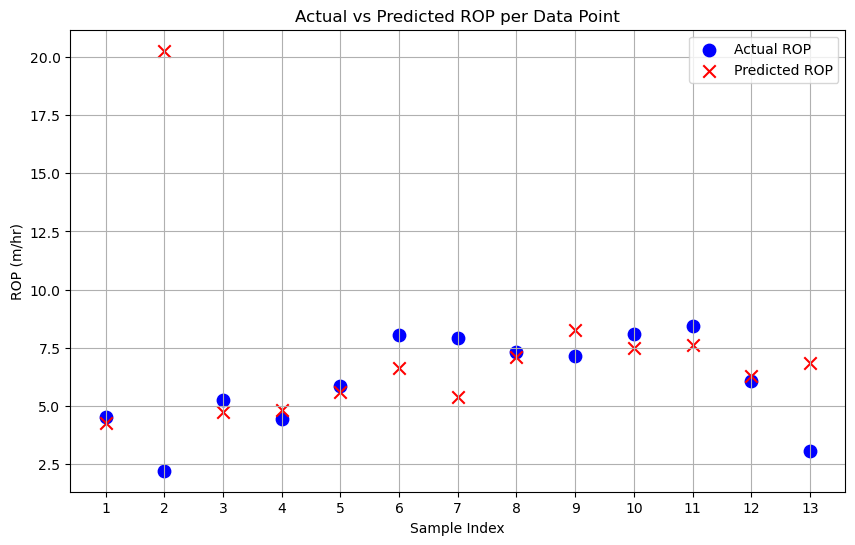

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample indices
indices = np.arange(1, len(sample_df) + 1)

plt.figure(figsize=(10,6))
plt.scatter(indices, sample_df["ROP"], color='blue', s=80, label='Actual ROP')
plt.scatter(indices, sample_df["Predicted_ROP"], color='red', s=80, label='Predicted ROP', marker='x')

plt.xlabel("Sample Index")
plt.ylabel("ROP (m/hr)")
plt.title("Actual vs Predicted ROP per Data Point")
plt.xticks(indices)  # show sample numbers 1,2,3,...
plt.legend()
plt.grid(True)
plt.show()






In [46]:
!pip install streamlit



In [48]:
import pickle


In [52]:
import pickle

# Save the trained Random Forest model
with open("rf_model_global.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("✅ Model saved as rf_model_global.pkl")


✅ Model saved as rf_model_global.pkl


In [53]:
import streamlit as st
import pandas as pd
import pickle

# -----------------------------
# Load trained model
# -----------------------------
with open("rf_model_global.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Column mapping
column_map = {
    "Bit Weight(klb)": "WOB",
    "Rotary RPM(RPM)": "RPM",
    "Flow In Rate(galUS/min)": "Flow",
    "ROP - Average(m/hr)": "ROP"
}

# -----------------------------
# Streamlit UI
# -----------------------------
st.title("📊 ROP Prediction")
st.write("Predict Rate of Penetration (ROP) using WOB, RPM, and Flow")

# Input sliders / number inputs
wob = st.number_input("WOB (Bit Weight in klb)", min_value=0.0, max_value=50.0, value=5.0, step=0.1)
rpm = st.number_input("Rotary RPM", min_value=0.0, max_value=200.0, value=75.0, step=0.1)
flow = st.number_input("Flow In Rate (galUS/min)", min_value=0.0, max_value=2000.0, value=600.0, step=1.0)

# Predict button
if st.button("Predict ROP"):
    # Prepare input
    test_df = pd.DataFrame({
        "Bit Weight(klb)": [wob],
        "Rotary RPM(RPM)": [rpm],
        "Flow In Rate(galUS/min)": [flow]
    })
    # Rename columns for model
    test_df = test_df.rename(columns={c: column_map[c] for c in test_df.columns if c in column_map})

    # Predict
    rop_pred = rf_model.predict(test_df)[0]

    st.success(f"Predicted ROP: {rop_pred:.2f} m/hr")


2026-01-09 14:03:53.164 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.395 
  command:

    streamlit run d:\folder\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-09 14:03:53.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 14:03:53.405 Thread 'MainThread': missing ScriptRun